In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [33]:
pd.options.mode.chained_assignment = None  # default='warn'
plt.style.use('ggplot')

Let's load in our master DataFrame with every year's data and look at the trends.

In [116]:
df = pd.read_csv('cleaned_data/all_years.csv')
df.tail()

,Year,Rank,Nation,Abbreviation,Count,Minutes,List
1900,2022,64,Hungary,hu,1,0,Krisztián Hegyi
1901,2022,65,Iraq,iq,1,0,Zidane Iqbal
1902,2022,66,Liberia,lr,1,0,Christian Saydee
1903,2022,67,Montenegro,me,1,0,Matija Šarkić
1904,2022,68,Montserrat,ms,1,0,Lyle Taylor


In [282]:
df.head(30).to_markdown(index=False)

'|   Year |   Rank | Nation                             | Abbreviation   |   Count |   Minutes | List                                                                                                                                              |\n|-------:|-------:|:-----------------------------------|:---------------|--------:|----------:|:--------------------------------------------------------------------------------------------------------------------------------------------------|\n|   1992 |      1 | England                            | eng            |     363 |    619773 | Brian Deane Matt Le Tissier Teddy Sheringham Les Ferdinand David White Mike Newell Paul Wilkinson Jason Dozzell Peter Beardsley John Williams ... |\n|   1992 |      2 | Scotland                           | sct            |      39 |     65060 | Brian McClair Tommy Wright John Hendrie Kevin Gallacher John Wark Colin Hendry Bryan Gunn Gary McAllister Scot Gemmill Paul Bernard ...           |\n|   1992 |      3 |

In [20]:
eng = df[df['Nation']=='England']
eng

,Year,Rank,Nation,Abbreviation,Count,Minutes,List
0,1992,1,England,eng,363,619773,Brian Deane Matt Le Tissier Teddy Sheringham L...
28,1993,1,England,eng,367,630123,Andy Cole Chris Sutton Matt Le Tissier Alan Sh...
53,1994,1,England,eng,350,608645,Alan Shearer Matt Le Tissier Robbie Fowler Les...
84,1995,1,England,eng,312,475290,Alan Shearer Robbie Fowler Les Ferdinand Teddy...
121,1996,1,England,eng,286,416543,Alan Shearer Ian Wright Robbie Fowler Les Ferd...
162,1997,1,England,eng,264,384564,Dion Dublin Michael Owen Chris Sutton David Be...
211,1998,1,England,eng,257,357766,Steve Guppy Michael Owen David Beckham Julian ...
267,1999,1,England,eng,254,333664,Kevin Phillips Alan Shearer Nick Barmby Trevor...
324,2000,1,England,eng,238,336914,Marcus Stewart Kevin Phillips Lee Bowyer David...
389,2001,1,England,eng,219,310640,Alan Shearer Kevin Phillips Matt Jansen Robbie...


Unsurprisingly, England is in 1st place for number of players for every year we are looking at. This makes sense given that the Premier League is based in England, and all of the teams have youth academies which are primarily composed of the youth living in or around the club. Let's see if England as a percentage of all players changes at all. 

In [31]:
total_num = df.groupby(['Year'])['Count'].sum()
eng['Total Players'] = list(total_num)
eng['English %'] = eng.apply(lambda row : round(row['Count']/row['Total Players']*100, 2), axis=1)
eng

,Year,Rank,Nation,Abbreviation,Count,Minutes,List,Total Players,English %
0,1992,1,England,eng,363,619773,Brian Deane Matt Le Tissier Teddy Sheringham L...,525,69.14
28,1993,1,England,eng,367,630123,Andy Cole Chris Sutton Matt Le Tissier Alan Sh...,530,69.25
53,1994,1,England,eng,350,608645,Alan Shearer Matt Le Tissier Robbie Fowler Les...,519,67.44
84,1995,1,England,eng,312,475290,Alan Shearer Robbie Fowler Les Ferdinand Teddy...,494,63.16
121,1996,1,England,eng,286,416543,Alan Shearer Ian Wright Robbie Fowler Les Ferd...,508,56.30
162,1997,1,England,eng,264,384564,Dion Dublin Michael Owen Chris Sutton David Be...,532,49.62
211,1998,1,England,eng,257,357766,Steve Guppy Michael Owen David Beckham Julian ...,536,47.95
267,1999,1,England,eng,254,333664,Kevin Phillips Alan Shearer Nick Barmby Trevor...,537,47.30
324,2000,1,England,eng,238,336914,Marcus Stewart Kevin Phillips Lee Bowyer David...,541,43.99
389,2001,1,England,eng,219,310640,Alan Shearer Kevin Phillips Matt Jansen Robbie...,530,41.32


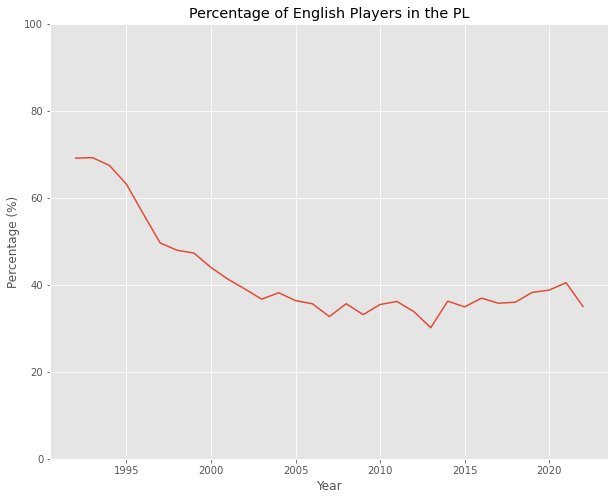

In [259]:
fig, ax = plt.subplots(figsize=(10,8))
eng.plot(kind='line', x='Year', y='English %', ax=ax)
ax.set(title='Percentage of English Players in the PL', ylabel=('Percentage (%)'))
ax.set_ylim([0,100])
ax.legend().set_visible(False)

We can see that the percentage has significantly decreased from just under 70% to under 40%, with only slight ticks back up. This is not surprising given the amount of imports from other countries the Premier League has pushed for in the bid to be the most competitive league in the world. We should next examine the other top countries. 

In [103]:
top_five = df[(df['Rank']>1) & (df['Rank']<5)]
top_five.groupby('Nation')['Count'].max().sort_values()

Nation
Norway                 22
Belgium                23
Netherlands            26
Wales                  30
Brazil                 35
Republic of Ireland    37
Spain                  37
Scotland               39
France                 44
Name: Count, dtype: int64

We can see the top 3 foreign countries (excluding England) of each year is a list comprising of France, Scotland, Spain, Republic of Ireland, Brazil, Wales, the Netherlands, Belgium, and Norway, sorted by the average number of players of those countries playing each year in the PL. 

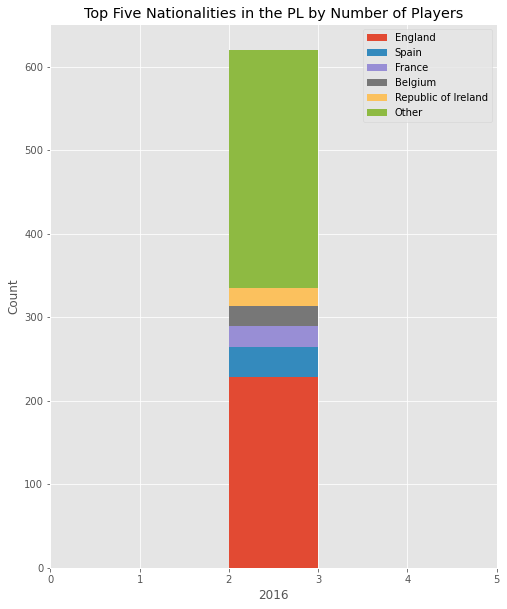

In [280]:
def stack_nationality_by_year(year):
    stacked = df[df['Year']==year]
    first = stacked.loc[stacked['Rank']==1, 'Count'].values[0]
    second = stacked.loc[stacked['Rank']==2, 'Count'].values[0]
    third = stacked.loc[stacked['Rank']==3, 'Count'].values[0]
    fourth = stacked.loc[stacked['Rank']==4, 'Count'].values[0]
    fifth = stacked.loc[stacked['Rank']==5, 'Count'].values[0]
    total = df.loc[df['Year']==year, 'Count'].values.sum()
    other = total-first-second-third-fourth-fifth

    fig, ax = plt.subplots(figsize=(8,10))
    ax.bar(2.5, first, 1, label=stacked.loc[stacked['Rank']==1, 'Nation'].values[0])
    ax.bar(2.5, second, 1, label=stacked.loc[stacked['Rank']==2, 'Nation'].values[0], bottom=first)
    ax.bar(2.5, third, 1, label=stacked.loc[stacked['Rank']==3, 'Nation'].values[0], bottom=first+second)
    ax.bar(2.5, fourth, 1, label=stacked.loc[stacked['Rank']==4, 'Nation'].values[0], bottom=first+second+third)
    ax.bar(2.5, fifth, 1, label=stacked.loc[stacked['Rank']==5, 'Nation'].values[0], bottom=first+second+third+fourth)
    ax.bar(2.5, other, 1, label='Other', bottom=total-other)
    ax.set_xlim([0,5])
    ax.set(title='Top Five Nationalities in the PL by Number of Players', xlabel=year, ylabel='Count')
    ax.legend(labels=[stacked.loc[stacked['Rank']==1, 'Nation'].values[0], stacked.loc[stacked['Rank']==2, 'Nation'].values[0], stacked.loc[stacked['Rank']==3, 'Nation'].values[0], stacked.loc[stacked['Rank']==4, 'Nation'].values[0], stacked.loc[stacked['Rank']==5, 'Nation'].values[0], 'Other'])

stack_nationality_by_year(2016)


Nothing too interesting there, so let's look at getting data for each country over the years in a hashmap.

In [184]:
nations = {}
for nation in df.loc[:,'Nation']:
    if nation not in nations:
        nations[nation] = []
for year in range(df['Year'].min(), df['Year'].max()+1):
    for nation in nations:
        if len(df.loc[(df['Year']==year) & (df['Nation']==nation)]) == 0:
            nations[nation].append(0)
        else:
            nations[nation].append(df.loc[(df['Year']==year) & (df['Nation']==nation), 'Count'].values[0])

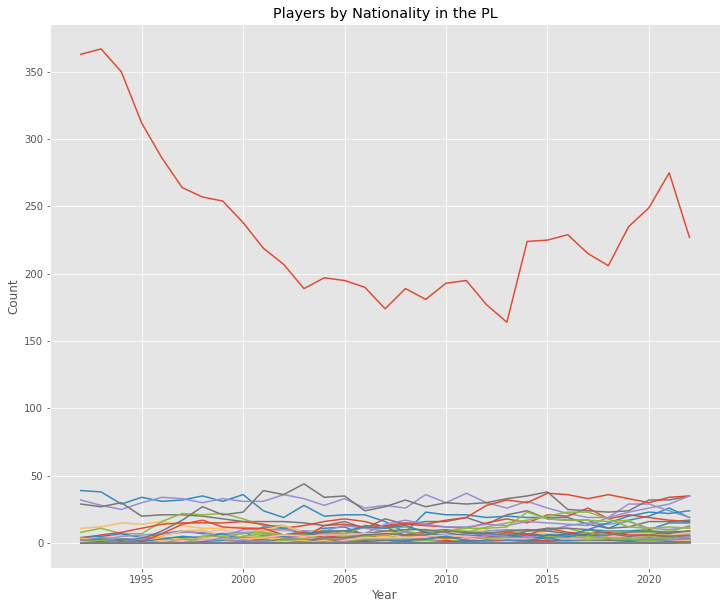

In [197]:
fig, ax = plt.subplots(figsize=(12,10))
for nation in nations:
    ax.plot(range(df['Year'].min(), df['Year'].max()+1), nations[nation])
    ax.set(title='Players by Nationality in the PL', xlabel='Year', ylabel='Count')
    # ax.legend(labels=nations.keys(), loc='lower right')

At a glance we can see that the overwhelming majority of players are still English. We also have too many nations under 50 players that we will have to rework the graph to have any fidelity.

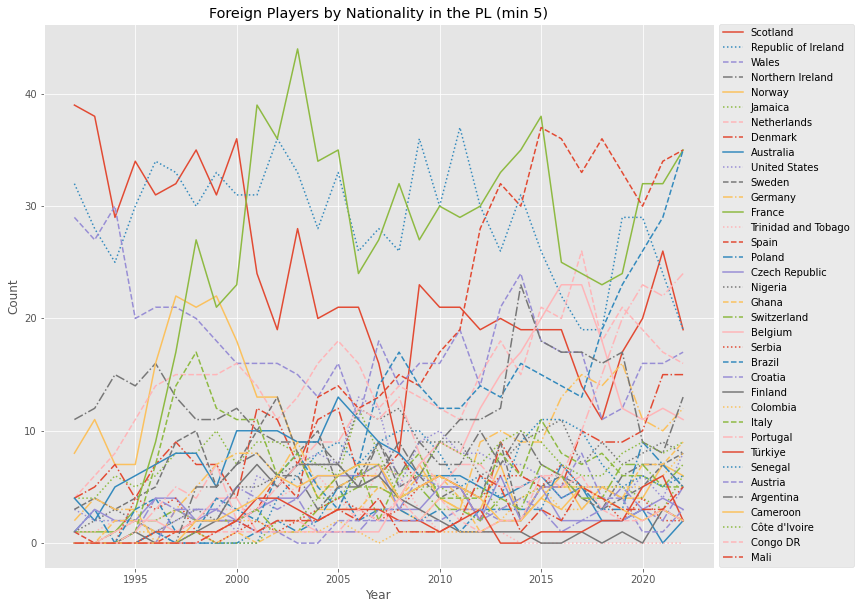

In [236]:
fig, ax = plt.subplots(figsize=(12,10))
labels = []
styles = ['solid', 'dotted', 'dashed', 'dashdot']
i = 0
for nation in nations:
    if nation != "England" and max(nations[nation])>5:
        labels.append(nation)
        ax.plot(range(df['Year'].min(), df['Year'].max()+1), nations[nation], linestyle=styles[i])
        i += 1
        i = 0 if i == 4 else i
ax.set(title='Foreign Players by Nationality in the PL (min 5)', xlabel='Year', ylabel='Count')
ax.legend(labels=labels, bbox_to_anchor=(1,1.01));

While still difficult to decipher by eye, the data is a little cleaner when excluding England and all countries who have never had 5 Premier League players at any one time. Some interesting takeaways include Norway's presence in the Premier League in the 90's, reaching as high as the 3rd most present foreign country, and the changing of the top 3 from Scotland, the Republic of Ireland, and Wales, to France, Spain, and Brazil.  

In [251]:
nation_sum = pd.DataFrame(columns=['Nation', 'First Year', 'Avg Rank', 'Max Rank', 'Min Rank', 'Avg Count', 'Max Count', 'Min Count', 'Avg Minutes', 'Total Minutes'])
for nation in nations:
    entry = []
    nation_df = df[df['Nation']==nation]
    entry = [nation, nation_df['Year'].min(), round(nation_df['Rank'].mean(), 1), nation_df['Rank'].min(), nation_df['Rank'].max(), round(nation_df['Count'].mean(), 1), nation_df['Count'].max(), nation_df['Count'].min(), int(nation_df['Minutes'].mean()), nation_df['Minutes'].sum()]
    nation_sum.loc[len(nation_sum)] = entry

In [255]:
print(nation_sum.to_markdown(index=False))

| Nation                             |   First Year |   Avg Rank |   Max Rank |   Min Rank |   Avg Count |   Max Count |   Min Count |   Avg Minutes |   Total Minutes |
|:-----------------------------------|-------------:|-----------:|-----------:|-----------:|------------:|------------:|------------:|--------------:|----------------:|
| England                            |         1992 |        1   |          1 |          1 |       233.7 |         367 |         164 |        315787 |         9789420 |
| Scotland                           |         1992 |        5   |          2 |         13 |        23.5 |          39 |           8 |         31778 |          985120 |
| Republic of Ireland                |         1992 |        3.3 |          2 |          7 |        28.8 |          37 |          19 |         40312 |         1249677 |
| Wales                              |         1992 |        6.5 |          2 |         12 |        17.9 |          30 |          11 |         25942 |     

In [257]:
df[df['Nation']=='Liberia']

,Year,Rank,Nation,Abbreviation,Count,Minutes,List
203,1997,42,Liberia,lr,1,702,Christopher Wreh
255,1998,45,Liberia,lr,1,417,Christopher Wreh
315,1999,49,Liberia,lr,1,876,George Weah
383,2000,60,Liberia,lr,1,475,George Weah
1703,2019,65,Liberia,lr,1,0,Christian Saydee
1902,2022,66,Liberia,lr,1,0,Christian Saydee
